In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

In [2]:
ts1 = pd.read_csv(r"Data/TS1.csv", encoding='unicode_escape')
ts2 = pd.read_csv(r"Data/TS2.csv", encoding='unicode_escape')
ts8 = pd.read_csv(r"Data/TS8.csv", encoding='unicode_escape', on_bad_lines='skip', low_memory=False)

## Data Cleaning

In [3]:
ts1.head()

,Rep,Cust,Customer Name,Group,Part Number,Description,Doc,Line,Date,Time,Qty,Unit,Disc%,Cost,Range
0,2,193750,ROCK AUTO LLC,ACC,ACC31019,LITERIDER 73-96 F-Series,01V4661208,1,Nov 07 22,08:22,1,308.74,NaN,262.33,0028
1,2,193750,ROCK AUTO LLC,ACC,ACC31029,LITERIDER 73-96 F-Series,01V4786521,2,Jan 04 23,16:33,1,296.23,NaN,248.63,0028
2,2,193750,ROCK AUTO LLC,ACC,ACC31109,LITERIDER 82-11 Ranger &,01V4689424,1,Nov 20 22,15:23,1,283.15,NaN,237.97,0028
3,2,193750,ROCK AUTO LLC,ACC,ACC31109,LITERIDER 82-11 Ranger &,01V4771133,1,Dec 29 22,08:28,1,283.15,NaN,236.97,0028
4,2,193750,ROCK AUTO LLC,ACC,ACC31129,LITERIDER 01-06 Explorer,01V4683310,1,Nov 16 22,15:27,1,283.15,NaN,243.50,0028


In [4]:
ts1.drop(columns=['Rep', 'Cust', 'Customer Name', 'Description', 'Doc', 'Disc%', 'Range'], inplace=True)
ts2.drop(columns=['Rep', 'Cust', 'Customer Name', 'Description', 'Doc', 'Disc%', 'Range'], inplace=True)
ts8.drop(columns=['Rep', 'Cust', 'Customer Name', 'Description', 'Doc', 'Disc%', 'Range'], inplace=True)

In [5]:
df_list = [ts1, ts2, ts8]

for i in df_list:
    print(f'Missing Values: {i.isnull().sum()}')

Missing Values: Group          8
Part Number    0
Line           0
Date           0
Time           0
Qty            0
Unit           0
Cost           0
dtype: int64
Missing Values: Group          1
Part Number    0
Line           0
Date           0
Time           0
Qty            0
Unit           0
Cost           0
dtype: int64
Missing Values: Group           1
Part Number     0
Line            0
Date            0
Time            0
Qty             0
Unit           21
Cost            0
dtype: int64


In [6]:
for i in df_list:
    i.dropna(inplace=True)

In [7]:
df_list = [ts1, ts2, ts8]

for i in df_list:
    print(f'Missing Values: {i.isnull().sum()}')

Missing Values: Group          0
Part Number    0
Line           0
Date           0
Time           0
Qty            0
Unit           0
Cost           0
dtype: int64
Missing Values: Group          0
Part Number    0
Line           0
Date           0
Time           0
Qty            0
Unit           0
Cost           0
dtype: int64
Missing Values: Group          0
Part Number    0
Line           0
Date           0
Time           0
Qty            0
Unit           0
Cost           0
dtype: int64


In [8]:
for i in df_list:
    print(f'Duplicate Values: {i.duplicated().sum()}')

Duplicate Values: 737
Duplicate Values: 639
Duplicate Values: 540


In [9]:
for i in df_list:
    i.drop_duplicates(inplace=True)

In [10]:
for i in df_list:
    print(f'Duplicate Values: {i.duplicated().sum()}')

Duplicate Values: 0
Duplicate Values: 0
Duplicate Values: 0


In [11]:
for i in df_list:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222302 entries, 0 to 223046
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Group        222302 non-null  object 
 1   Part Number  222302 non-null  object 
 2   Line         222302 non-null  int64  
 3   Date         222302 non-null  object 
 4   Time         222302 non-null  object 
 5   Qty          222302 non-null  int64  
 6   Unit         222302 non-null  float64
 7   Cost         222302 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 15.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 163148 entries, 0 to 163787
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Group        163148 non-null  object 
 1   Part Number  163148 non-null  object 
 2   Line         163148 non-null  int64  
 3   Date         163148 non-null  object 
 4   Time         163148

In [12]:
ts8['Cost'] = ts8['Cost'].astype(float)
ts8['Line'] = ts8['Line'].astype(float)

In [13]:
for i in df_list:
    i['Date'] = pd.to_datetime(i['Date'])

In [14]:
for i in df_list:
    i.set_index(['Group', 'Date'], inplace=True)

In [15]:
ts8.head()

Part Number  Line   Time  Qty    Unit    Cost
Group Date                                                    
AAE   2022-11-06    AAE3004N   1.0  16:46  1.0  292.05  263.11
      2022-12-08    AAE3004N   1.0  16:20  1.0  292.05  263.11
      2023-01-03    AAE3004N   1.0  08:40  1.0  292.05  263.11
      2023-01-05    AAE3004N   1.0  08:13  1.0  292.05  263.11
      2023-01-29    AAE3004N   1.0  17:14  1.0  292.05  263.11

In [16]:
plot_ts1 = ts1.loc['SKP']
plot_ts2 = ts2.loc['SKP']
plot_ts8 = ts8.loc['SKP']

In [17]:
skp_ts1 = plot_ts1.groupby('Date').sum()
skp_ts2 = plot_ts2.groupby('Date').sum()
skp_ts8 = plot_ts8.groupby('Date').sum()

In [18]:
def plot_results(data_list, y, titles):
    with plt.style.context(['seaborn-muted', 'dark_background']):
        fig, ax = plt.subplots(3,1,figsize=(20,15))
        ax = ax.ravel()
        for i, data in enumerate(data_list):
            sns.lineplot(data=data, x=data.index, y=y, ax=ax[i], zorder=3, marker='o')
            ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%y'))
            ax[i].set_xlim(data.index.min(), data.index.max())
            ax[i].set_xlabel('Dates Bimonthly', fontsize=12)
            ax[i].set_ylim(data[y].min(), data[y].max())
            ax[i].grid(zorder=0, alpha=0.5, color='grey', linestyle='--')
            if y == 'Cost':
                ax[i].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'${x:,.0f}'))
                ax[i].set_ylabel('RockAuto Product Sales Bimonthly', fontsize=12)
                pass
            else:
                ax[i].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))
                ax[i].set_ylabel(f"{y}s Per Invoiced Product Sale", fontsize=12)
                pass
                
            for i in range(len(titles)):
                ax[i].set_title(f'({titles[i]}) Product Sales by Date and Customer', fontsize=20)
            
            ax[i].tick_params(axis='both', which='major', labelsize=12)
            
    plt.tight_layout()
    plt.show()

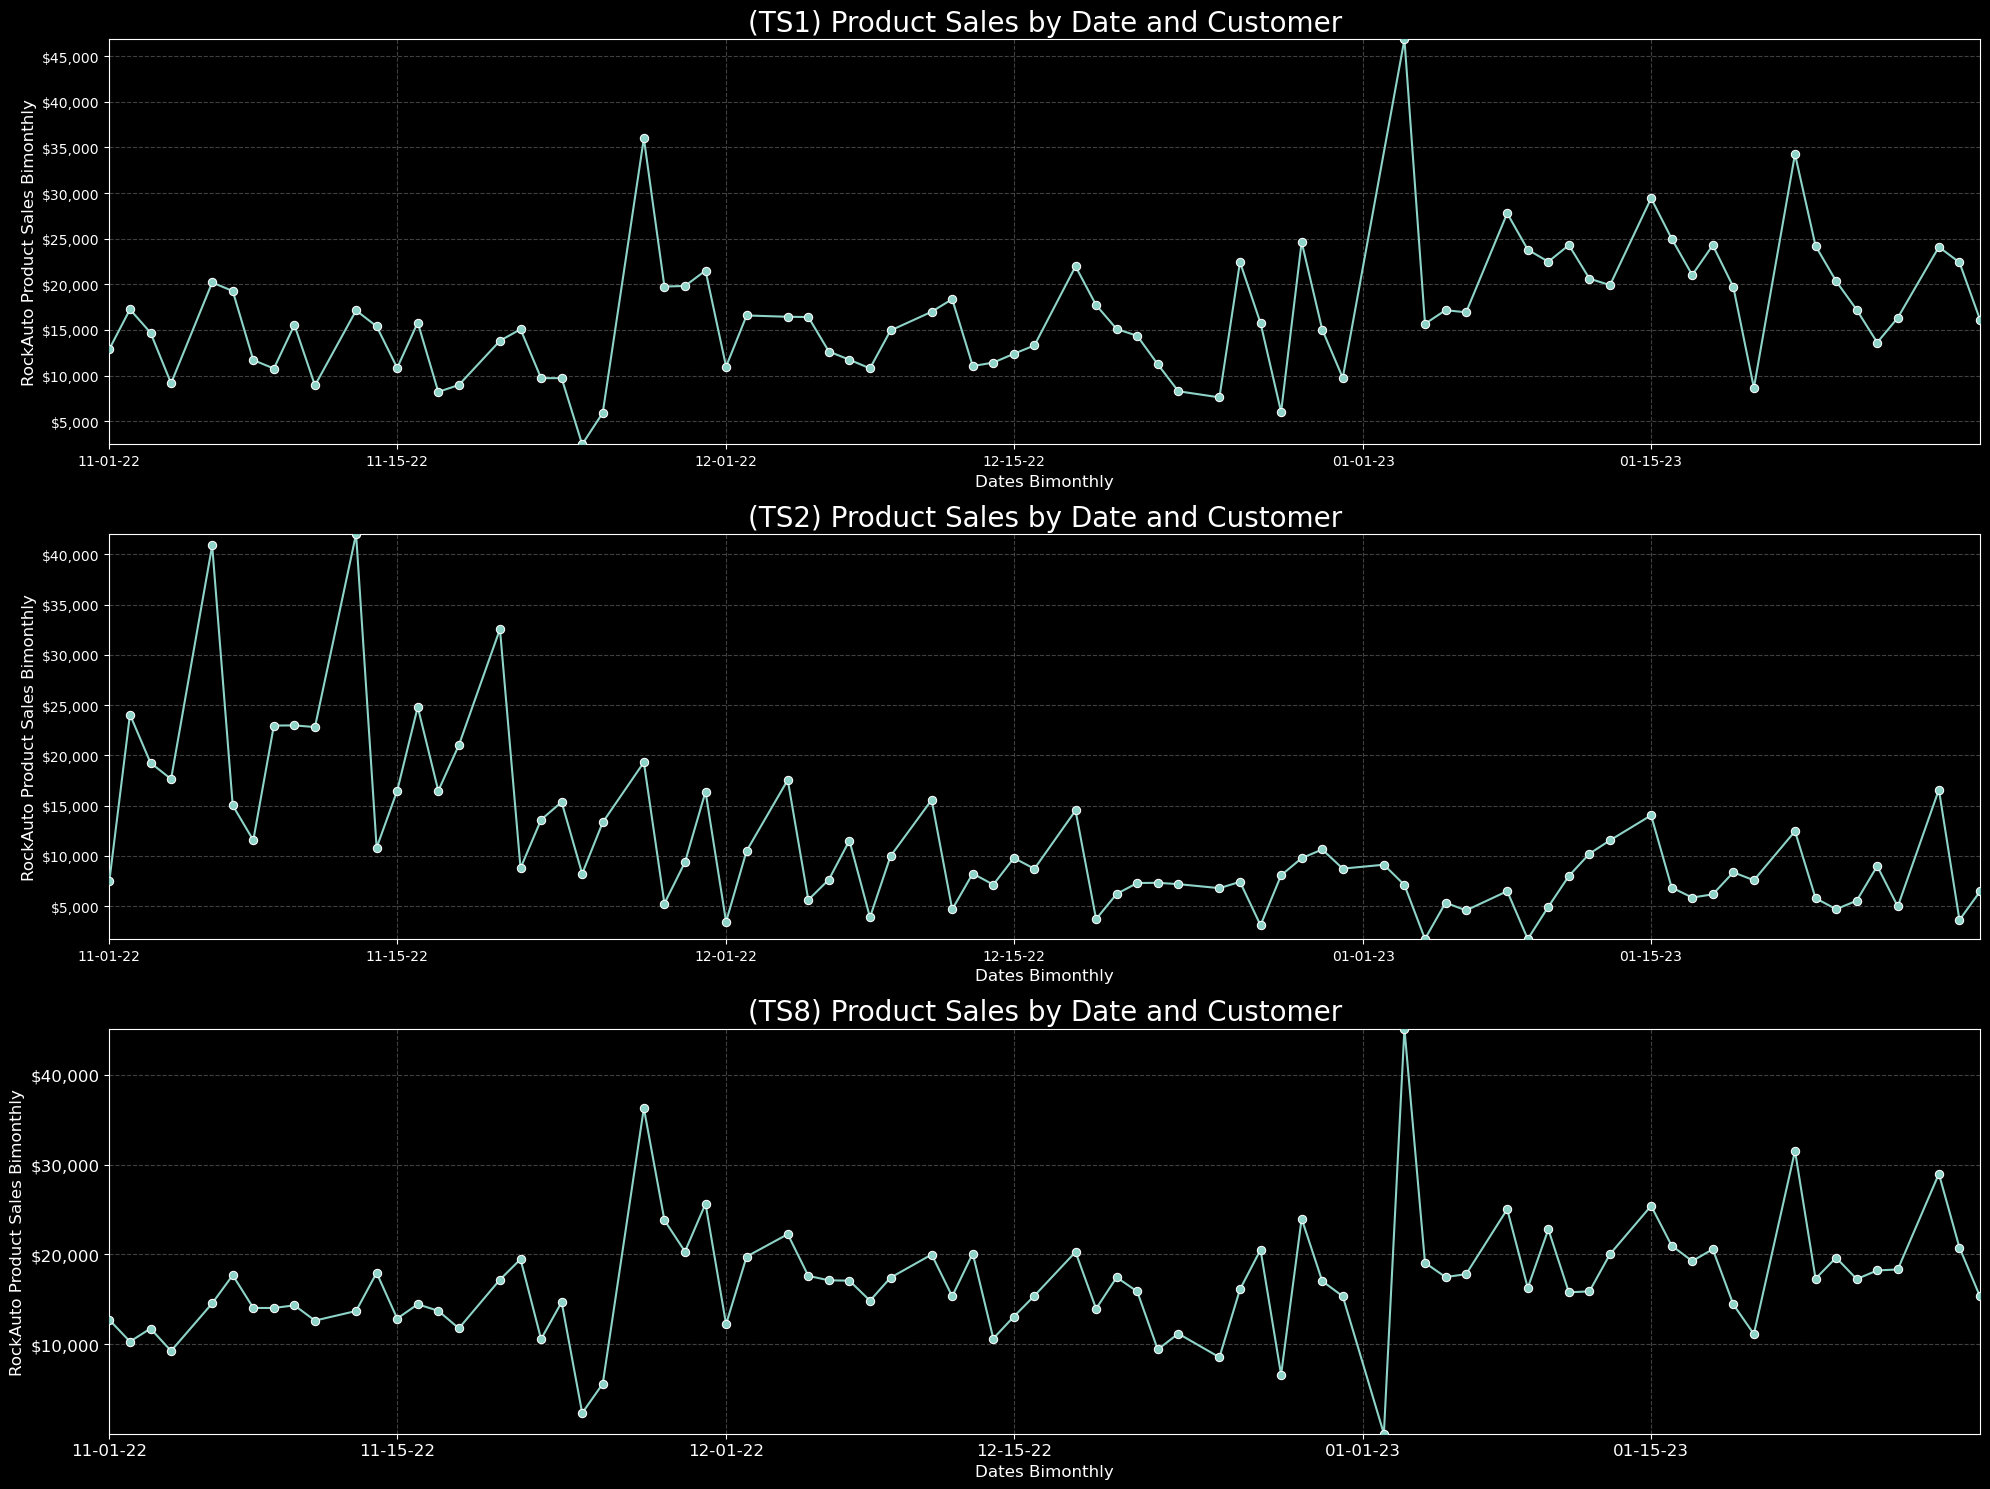

In [19]:
plot_results([skp_ts1, skp_ts2, skp_ts8], 'Cost', ['TS1', 'TS2', 'TS8'])

In [20]:
plot_ts1 = ts1.groupby('Date').sum()
plot_ts2 = ts2.groupby('Date').sum()
plot_ts8 = ts8.groupby('Date').sum()

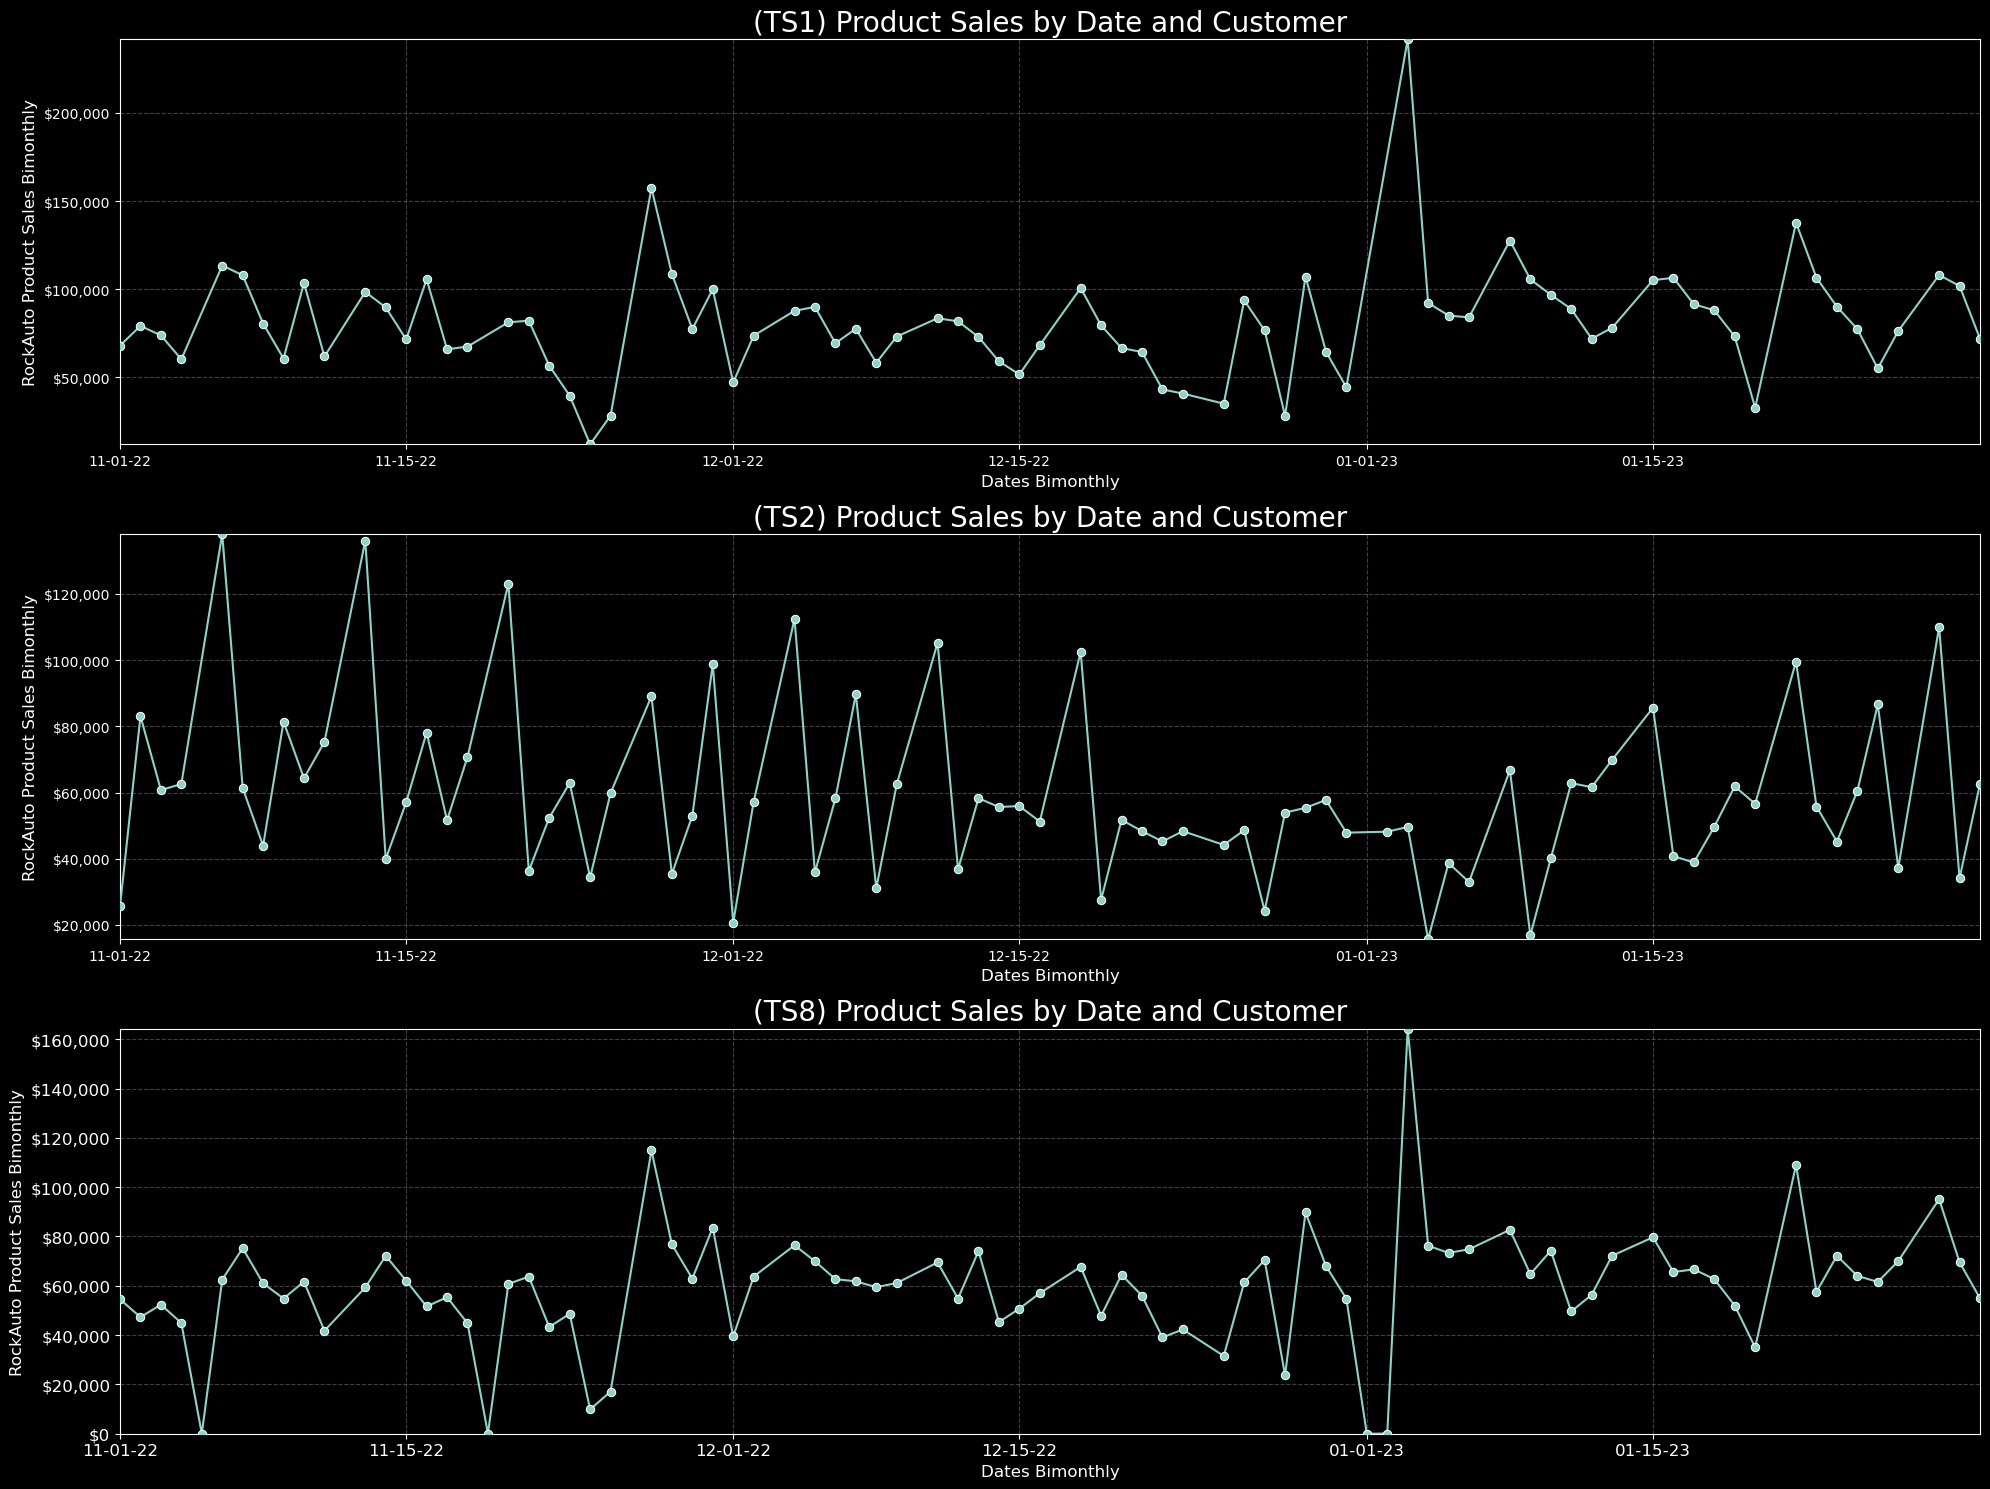

In [21]:
plot_results([plot_ts1, plot_ts2, plot_ts8], 'Cost', ['TS1', 'TS2', 'TS8'])

In [27]:
def density_plot(data_list, y, titles):
    with plt.style.context(['seaborn-muted', 'dark_background']):
        fig, ax = plt.subplots(3,1,figsize=(20,15))
        ax = ax.ravel()
        for i, data in enumerate(data_list):
            sns.kdeplot(data=data, x=y, ax=ax[i], fill=True, bw_method=0.05)
            if y == 'Cost':
                ax[i].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'${x:,.0f}'))
                ax[i].set_xlabel('RockAuto Product Sales Bimonthly', fontsize=12)
                pass
            else:
                ax[i].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))
                ax[i].set_xlabel(f"{y}s Per Invoiced Product Sale", fontsize=12)
                pass

            ax[i].grid(zorder=0, alpha=0.5, color='grey', linestyle='--')
            for i in range(len(titles)):
                ax[i].set_title(f'({titles[i]})', fontsize=20)
            
            ax[i].tick_params(axis='both', which='major', labelsize=12)
            
        plt.tight_layout()
        plt.show()

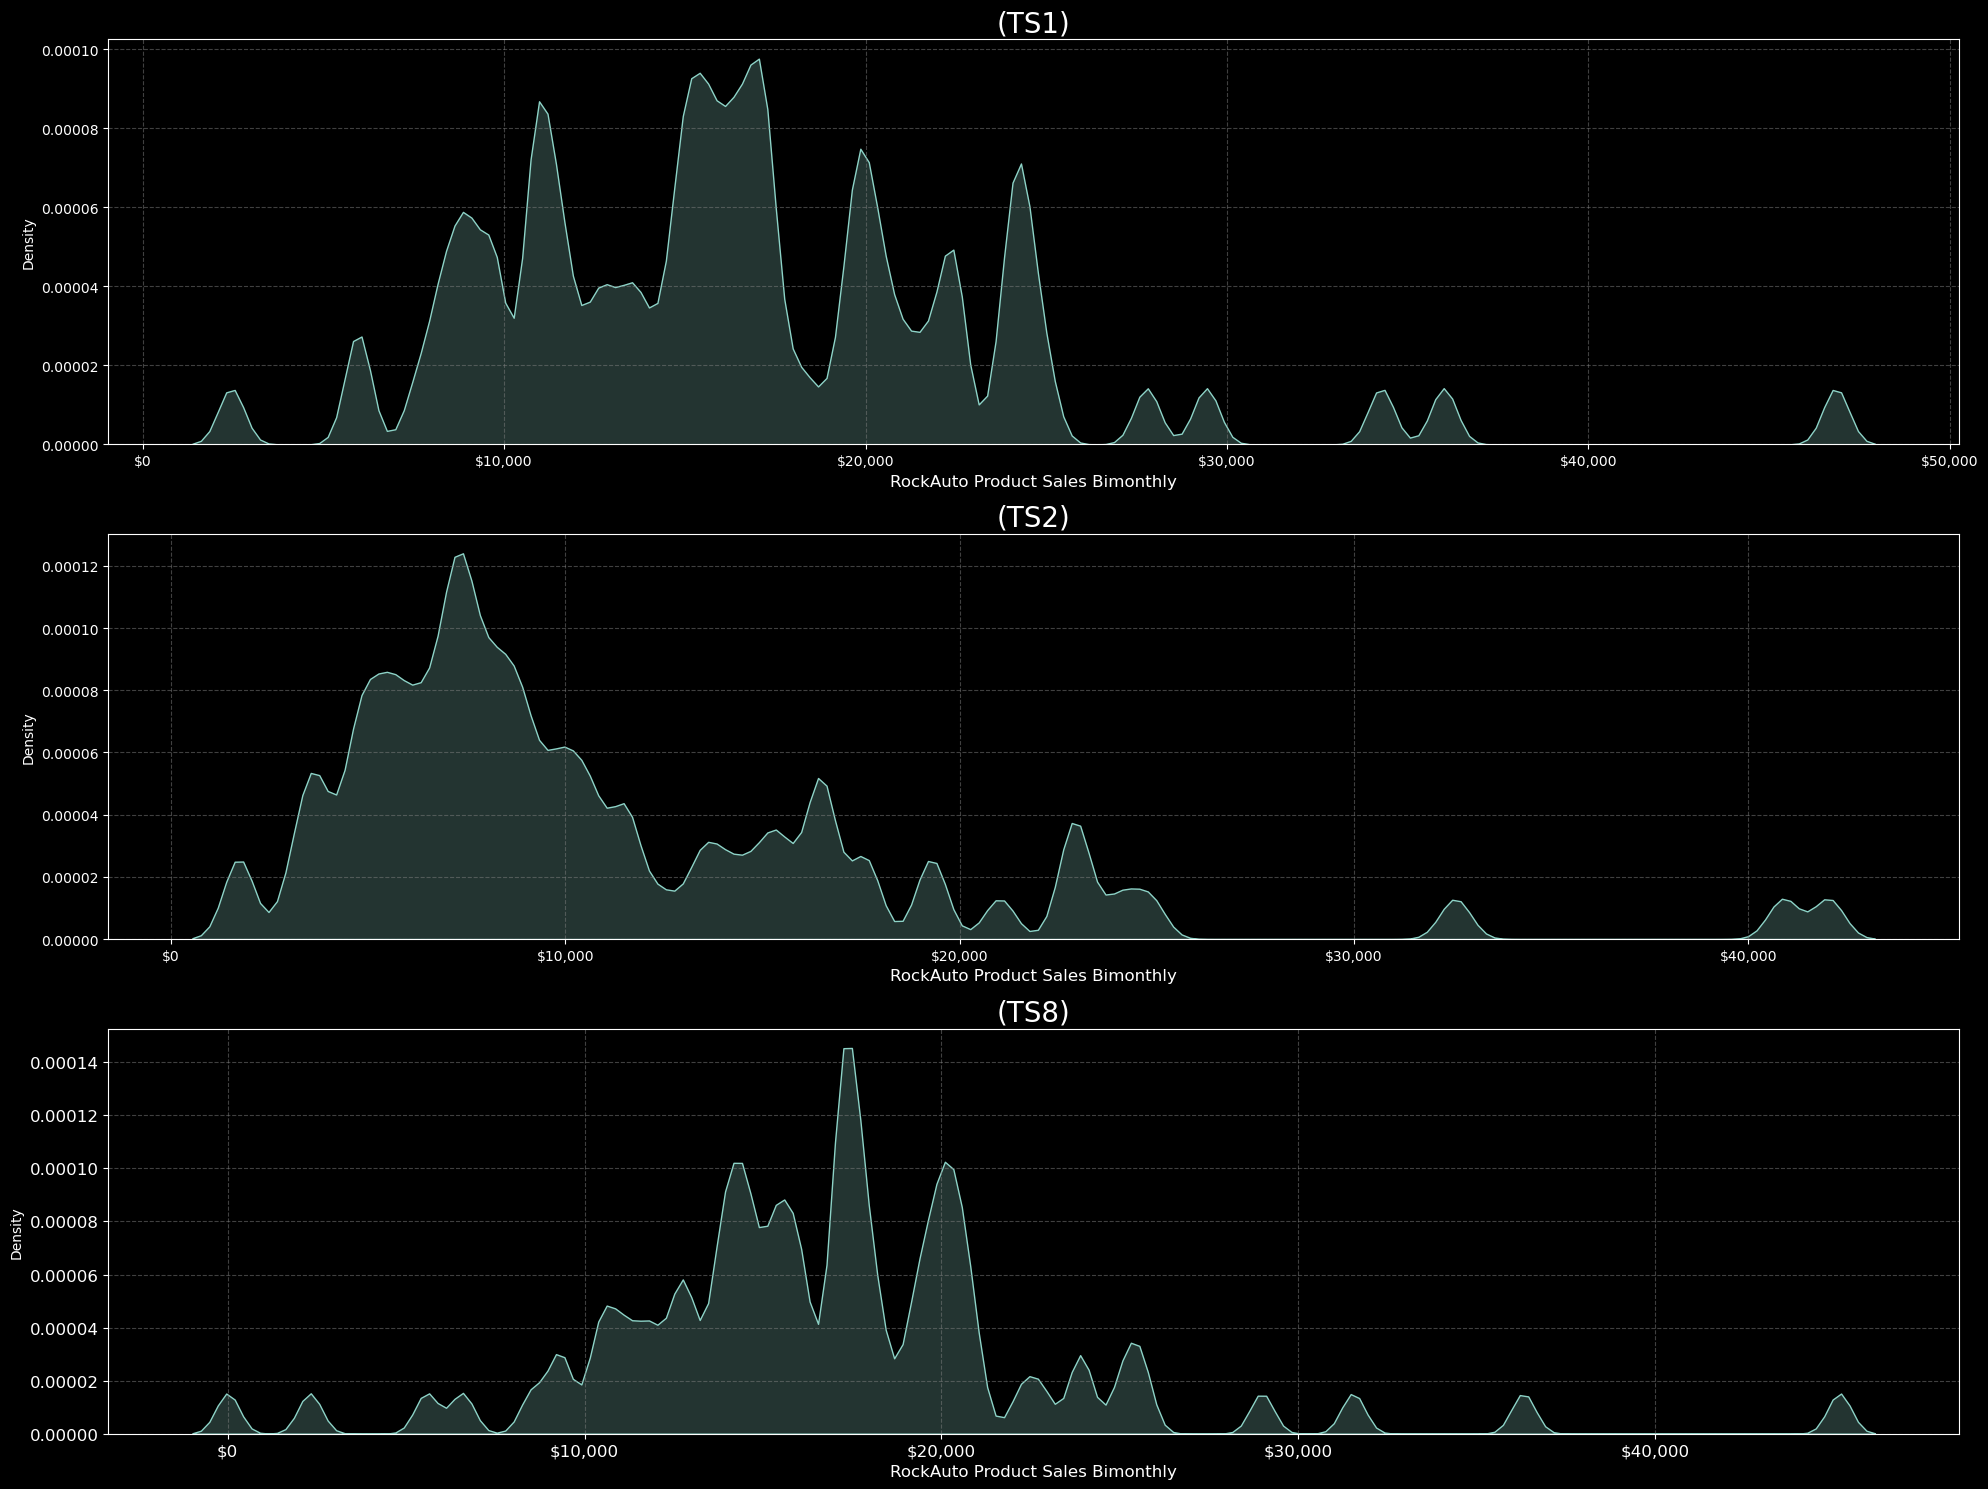

In [28]:
density_plot([skp_ts1, skp_ts2, skp_ts8], 'Cost', ['TS1', 'TS2', 'TS8'])

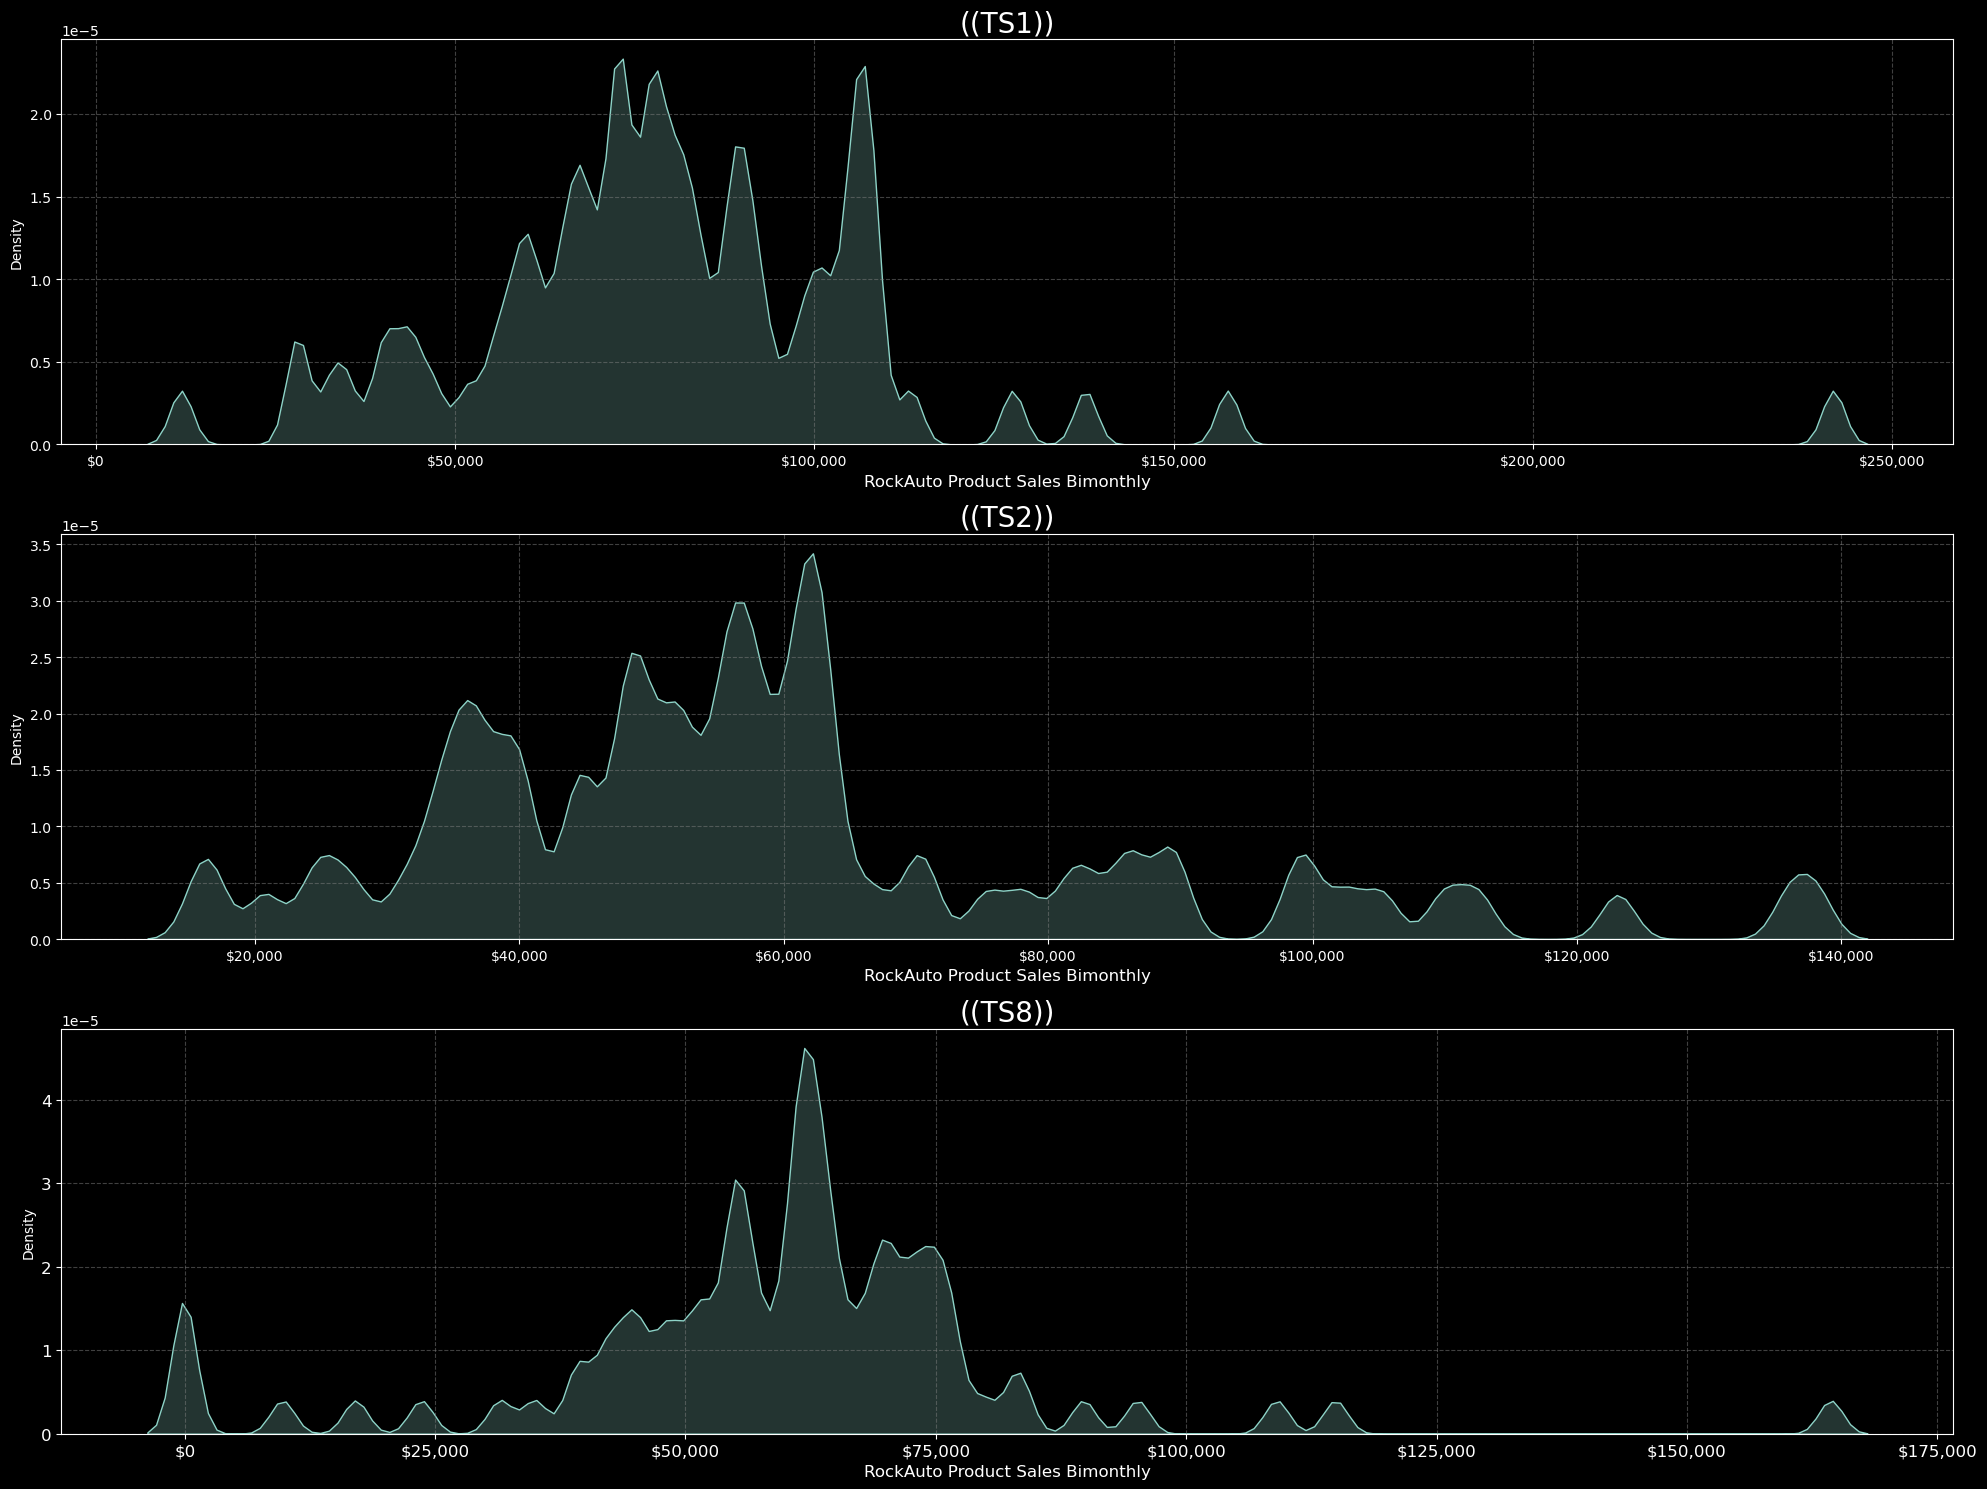

In [29]:
density_plot([plot_ts1, plot_ts2, plot_ts8], 'Cost', ['(TS1)', '(TS2)', '(TS8)'])